In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['figure.figsize']=(12,8)

In [2]:
def replace_string(data, column):
    k_columns = data[data[column].str.contains("K")]
    k_columns = k_columns.loc[k_columns[column]!='K']
    k_columns[column] = k_columns[column].str.strip('K').astype('float') * 1000
    m_columns = data[data[column].str.contains("M")]
    m_columns = m_columns.loc[m_columns[column]!='M']
    m_columns[column] = m_columns[column].str.strip('M').astype('float') * 1e6
    b_columns = data[data[column].str.contains("B")]
    b_columns = b_columns.loc[b_columns[column]!='B']
    b_columns[column] = b_columns[column].str.strip('B').astype('float') * 1e9
    columns = pd.concat([k_columns, m_columns, b_columns], axis=0)
    
    columns = columns.sort_index()
    
    return columns

In [3]:
%%time
storm_events = []
init_path = '/Users/allanbellahsene/Desktop/THESIS/DATA/NCFEI/StormEvents_' #Mac_OS path
#init_path = 'C:\\Users\\abellahsene\\Desktop\\THESIS\\DATA\\NCFEI\\StormEvents_' #Windows path
for years in list(np.arange(1962,2020)):
    path = init_path + str(years) + '.csv'
    storm_data = pd.read_csv(path, usecols=['BEGIN_DAY', 'MONTH_NAME', 'YEAR', 'STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'EVENT_TYPE', 'EPISODE_ID', 'EVENT_ID', 'DEATHS_DIRECT', 'DEATHS_INDIRECT'])
    storm_data.index = pd.to_datetime(storm_data['BEGIN_DAY'].astype('str')+ '-' + storm_data['MONTH_NAME'] + '-' + storm_data.YEAR.astype('str'))
    storm_data = storm_data[['STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']] #keep only relevant columns
    storm_data.dropna(inplace=True) #drop missing values
    storm_data.sort_index(inplace=True) #sort data by date
    storm_events.append(storm_data)
    #print(years)
STORMS = pd.concat([storm_events[0], storm_events[1]], axis=0)
for i in range(2, len(storm_events)):
    STORMS = pd.concat([STORMS, storm_events[i]], axis=0)
print(STORMS.shape)
df = STORMS
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].astype('str')
df['DAMAGE_CROPS'] = df['DAMAGE_CROPS'].astype('str')
STORMS = df
STORMS = STORMS.loc[((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS =='0')) | ((STORMS.DAMAGE_PROPERTY=='0') & (STORMS.DAMAGE_CROPS !='0')) | ((STORMS.DAMAGE_PROPERTY!='0') & (STORMS.DAMAGE_CROPS !='0'))]
STORMS = STORMS.loc[STORMS.DAMAGE_PROPERTY!='K'] #delete rows that only contain "K"
STORMS = STORMS.loc[STORMS.DAMAGE_CROPS!='K']
STORMS = replace_string(STORMS, 'DAMAGE_PROPERTY')
STORMS = replace_string(STORMS, 'DAMAGE_CROPS')
STORMS['TOTAL_DAMAGES'] = STORMS['DAMAGE_PROPERTY'] + STORMS['DAMAGE_CROPS']
STORMS['Date'] = STORMS.index
STORMS = STORMS[['Date','STATE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'TOTAL_DAMAGES', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'EVENT_TYPE', 'EVENT_ID', 'EPISODE_ID']]
df = STORMS.groupby(['STATE', 'Date']).agg({'TOTAL_DAMAGES':sum})
STORMS = STORMS.loc[STORMS['TOTAL_DAMAGES']!=0]
States = list(STORMS.STATE.unique())

(708372, 8)
CPU times: user 19.3 s, sys: 2.78 s, total: 22 s
Wall time: 23.8 s


In [4]:
v_cons = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Excessive Heat': 'Low',
           'Waterspout': 'Medium',
           'High Wind': 'High',
           'Flash Flood': 'Medium',
           'Flood': 'High',
           'Cold/Wind Chill': 'Medium',
           'Ice Storm': 'High',
           'Hail': 'High',
           'Lightning': 'High',
           'Drought': 'Medium',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'High',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'High',
           'Frost/Freeze': 'High',
           'Winter Weather': 'Medium',
           'Dense Fog': 'Medium',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'High',
           'Coastal Flood': 'High',
           'Heat': 'Medium',
           'Marine Thunderstorm Wind': 'Low',
           'Landslide': 'High',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'High',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Medium',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Medium',
           'Dust Devil': 'Medium',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Medium',
           'Rip Current': 'Low',
           'Sleet': 'Medium',
           'Marine Hurricane/Typhoon': 'Low',
           'Marine Lightning': 'Medium',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}

v_agr = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Excessive Heat': 'High',
           'Waterspout': 'Low',
           'High Wind': 'High',
           'Flash Flood': 'High',
           'Flood': 'High',
           'Cold/Wind Chill': 'High',
           'Ice Storm': 'High',
           'Hail': 'High',
           'Lightning': 'Medium',
           'Drought': 'High',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'Medium',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'Medium',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'High',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Medium',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'Medium',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Low',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Hurricane (Typhoon)': 'High',
           'Marine Hurrican/Typhoon': 'Low',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}

v_agr = {'Tornado': 'Medium',
           'Winter Storm': 'Medium',
           'Thunderstorm Wind': 'Medium',
           'Waterspout': 'Low',
           'Excessive Heat': 'High',
           'High Wind': 'Medium',
           'Flash Flood': 'Medium',
           'Flood': 'High',
           'Cold/Wind Chill': 'Medium',
           'Marine Hurricane/Typhoon' : 'Low',
           'Ice Storm': 'Medium',
           'Hail': 'Medium',
           'Lightning': 'Medium',
           'Drought': 'High',
           'Hurricane (Typhoon)': 'Medium',
           'Storm Surge/Tide': 'Medium',
           'Wildfire': 'High',
           'Heavy Rain': 'High',
           'Heavy Snow': 'High',
           'Blizzard': 'Medium',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'High',
           'Tropical Storm': 'High',
           'Dust Storm': 'Medium',
           'Extreme Cold/Wind Chill': 'Medium',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'High',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Medium',
           'Lake-Effect Snow': 'Medium',
           'High Surf': 'Medium',
           'Lakeshore Flood': 'Low',
           'Tsunami': 'Medium',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Low',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Low',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Hurricane (Typhoon)': 'High',
           'Marine Hurrican/Typhoon': 'Low',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}


v_energy = {'Tornado': 'High',
           'Winter Storm': 'High',
           'Thunderstorm Wind': 'High',
           'Excessive Heat': 'Medium',
           'Waterspout': 'High',
           'High Wind': 'High',
           'Flash Flood': 'High',
           'Flood': 'High',
           'Cold/Wind Chill': 'High',
           'Ice Storm': 'High',
           'Hail': 'Medium',
           'Lightning': 'High',
           'Drought': 'Medium',
           'Hurricane (Typhoon)': 'High',
           'Storm Surge/Tide': 'High',
           'Wildfire': 'Medium',
           'Heavy Rain': 'Medium',
           'Heavy Snow': 'Medium',
           'Blizzard': 'High',
           'Frost/Freeze': 'Medium',
           'Winter Weather': 'Low',
           'Dense Fog': 'Low',
           'Strong Wind': 'Medium',
           'Tropical Storm': 'Medium',
           'Dust Storm': 'Low',
           'Extreme Cold/Wind Chill': 'Low',
           'Debris Flow': 'Medium',
           'Coastal Flood': 'Medium',
           'Heat': 'Low',
           'Marine Thunderstorm Wind': 'Medium',
           'Landslide': 'Low',
           'Lake-Effect Snow': 'Low',
           'High Surf': 'Low',
           'Lakeshore Flood': 'Medium',
           'Tsunami': 'High',
           'Seiche': 'Low',
           'Marine Strong Wind': 'Medium',
           'Avalanche': 'Low',
           'Hurricane': 'High',
           'Dense Smoke': 'Low',
           'Freezing Fog': 'Low',
           'Dust Devil': 'Low',
           'Funnel Cloud': 'Low',
           'Marine High Wind': 'Medium',
           'Marine Hail': 'Low',
           'Tropical Depression': 'Medium',
           'Rip Current': 'Low',
           'Sleet': 'Low',
           'Marine Hurricane/Typhoon': 'Medium',
           'Marine Lightning': 'Low',
           'Marine Dense Fog': 'Low',
           'Sneakerwave': 'Low'}


In [5]:
STORMS['Vulnerability Energy'] = STORMS['EVENT_TYPE'].map(v_energy)
STORMS['Vulnerability Agriculture'] = STORMS['EVENT_TYPE'].map(v_agr)
STORMS['Vulnerability Construction'] = STORMS['EVENT_TYPE'].map(v_cons)

In [6]:
def climate_score(climate_data, start_year, end_year, state, sector):
    df = climate_data.copy()
    df = df.loc[(df.index>=start_year+'-01-01') & (df.index<=end_year+'-12-31') & (df.STATE==state)]
    if sector == 'All':
        df['Vulnerability'] = np.ones(len(df)).reshape(-1,1)
    else:
        df['Vulnerability'] = df['Vulnerability '+sector].map({'High': 1, 'Medium': 0.5, 'Low': 0})
    
    df.dropna(inplace=True)
    
    score = np.dot(np.array(df.TOTAL_DAMAGES).T, np.array(df.Vulnerability))
    
    return score

def vulnerability_table(climate_data, start_year, end_year, state, sector):
    df = climate_data.copy()
    df = df.loc[(df.index>=start_year+'-01-01') & (df.index<=end_year+'-12-31') & (df.STATE==state)]
    if sector == 'All':
        df['Vulnerability'] = np.ones(len(df)).reshape(-1,1)
    else:
        df['Vulnerability'] = df['Vulnerability '+sector].map({'High': 1, 'Medium': 0.5, 'Low': 0})
    
    df.dropna(inplace=True)
    
    
    
    return df

def climate_ranking(climate_data, start_year, end_year, sector):
    
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    score = []
    for states in list(climate_data.STATE.unique()):
        score.extend((states, climate_score(climate_data, start_year, end_year, states, sector)))
    score = np.array(score).reshape((int(len(score)/2), 2))
    ranking = pd.DataFrame(score, columns=['State', 'Climate Score Risk'])
    ranking['Climate Score Risk'] = ranking['Climate Score Risk'].astype('float')
    ranking.sort_values(by='Climate Score Risk', inplace=True, ascending=False)
    ranking.reset_index(inplace=True)
    ranking.drop(columns=['index'], inplace=True)
    
    ranking['Climate Score Risk'] = scaler.fit_transform(ranking['Climate Score Risk'].values.reshape(-1,1))
    ranking['Climate Score Risk'] = 1 - ranking['Climate Score Risk']
    
    return ranking

def financial_ranking(fin_data, start_year, end_year, sector, method):
    import random
    data = fin_data.loc[(fin_data.index>=start_year+'-01-01') & (fin_data.index<=end_year+'-12-31') & (fin_data.naics.astype('str').str.startswith(sector))]
    
    states = data.State.unique()
    av_roa = []
    if method == 'Average':
        for state in states:
            companies = data.conm.loc[data.State==state].unique()
            for comp in companies:
                ROA = data.ROA.loc[data.conm==comp].mean()
                av_roa.extend((state, ROA, comp))
        av_roa = np.array(av_roa).reshape(int(len(av_roa)/3), 3)
        av_roa = pd.DataFrame(av_roa, columns=['State', 'Average ROA', 'Company'])
        av_roa['Average ROA'] = av_roa['Average ROA'].astype('float')
        av_roa = pd.DataFrame(av_roa.groupby('State')['Average ROA'].mean())
        av_roa.sort_values('Average ROA', inplace=True)
    
    elif method == 'Random':
        for state in states:
            companies = data.conm.loc[data.State==state].unique()
            comp = random.choice(companies)
            ROA = data.ROA.loc[data.conm==comp].mean()
            av_roa.extend((state, ROA, comp))
        av_roa = np.array(av_roa).reshape(int(len(av_roa)/3), 3)
        av_roa = pd.DataFrame(av_roa, columns=['State', 'Average ROA', 'Company'])
        av_roa['Average ROA'] = av_roa['Average ROA'].astype('float')
        av_roa = av_roa[['State', 'Average ROA']]
        av_roa.sort_values('Average ROA', inplace=True)
        av_roa.index = av_roa['State']
        av_roa.drop(columns=['State'], inplace=True)
    
    else:
        print('This method is not available.')
    
    return av_roa

def plot_linear_regression(data, exo_var, endo_var):
    from sklearn.linear_model import LinearRegression
    Y = data[exo_var].values.reshape(-1,1)
    X = data[endo_var].values.reshape(-1,1)
    model = LinearRegression().fit(X,Y)
    Y_pred = model.predict(X)
    R_squared = model.score(X,Y)
    alpha, beta = [model.intercept_[0], model.coef_[0]]
    plt.scatter(X,Y)
    plt.plot(X,Y_pred, color='red')
    plt.xlabel(endo_var)
    plt.ylabel(exo_var)
    plt.legend(['y = ' + str(round(alpha,5)) + '+ ' + str(round(float(beta), 4)) + 'X'])
    plt.title('Linear Regression of ' + exo_var + ' against ' + endo_var + ', $R^2$ = ' + str(R_squared))
    
def ranking(fin_data, climate_data, method, start_year, end_year, sector_name, sector_naics):
    
    fin_ranking = financial_ranking(fin_data=fin_data, start_year=start_year, end_year=end_year, sector=sector_naics, method=method)
    climateranking = climate_ranking(climate_data=climate_data, start_year=start_year, end_year=end_year, sector=sector_name)
    climateranking.index = climateranking.State
    climateranking.drop(columns=['State'], inplace=True)
    ranking = fin_ranking.merge(climateranking, on='State', how='left')
    
    return ranking
    
def display_results(fin_data, climate_data, method, start_year, end_year, sector_name, sector_naics):
    fin_ranking = financial_ranking(fin_data=fin_data, start_year=start_year, end_year=end_year, sector=sector_naics, method=method)
    climateranking = climate_ranking(climate_data=climate_data, start_year=start_year, end_year=end_year, sector=sector_name)
    climateranking.index = climateranking.State
    climateranking.drop(columns=['State'], inplace=True)
    ranking = fin_ranking.merge(climateranking, on='State', how='left')
    worst_clim_states = list(ranking['Climate Score Risk'].nsmallest(5).index)
    best_clim_states = list(ranking['Climate Score Risk'].nlargest(5).index)
    best_ROA = ranking['Average ROA'].loc[ranking.index.isin(best_clim_states)].mean()
    worst_ROA = ranking['Average ROA'].loc[ranking.index.isin(worst_clim_states)].mean()
    diff = best_ROA - worst_ROA
    worst_fin_states = list(ranking['Average ROA'].nsmallest(5).index)
    best_fin_states = list(ranking['Average ROA'].nlargest(5).index)
    best_clim_states = np.array(best_clim_states).reshape(-1,1)
    best_fin_states = np.array(best_fin_states).reshape(-1,1)
    best_states = np.concatenate((best_clim_states, best_fin_states), axis=1)
    best_states = pd.DataFrame(best_states, columns=['Top 5 Less Climate at Risk States', 'Top 5 Most Financially Performant States'])
    worst_clim_states = np.array(worst_clim_states).reshape(-1,1)
    worst_fin_states = np.array(worst_fin_states).reshape(-1,1)
    worst_states = np.concatenate((worst_clim_states, worst_fin_states), axis=1)
    worst_states = pd.DataFrame(worst_states, columns=['Top 5 Most Climate at Risk States', 'Top 5 Less Financially Performant States'])
    pearson_corr = ranking['Climate Score Risk'].corr(ranking['Average ROA'])
    spearman_corr = stats.spearmanr(ranking.iloc[:,0], ranking.iloc[:,1])[0]
    kendall_corr = stats.kendalltau(ranking.iloc[:,0], ranking.iloc[:,1])[0]
    corr_measures = pd.DataFrame([[pearson_corr], [spearman_corr], [kendall_corr]], [['Pearson Correlation', 'Spearman Correlation', 'Kendall Correlation']], columns=['Correlation Measure'])
    
    print('Sector: ' + str(sector_name), 'Ranking', ranking, 'Top 5 Best States', best_states, 'Top 5 Worst States', worst_states,
      'Average ROA of 5 less risky States: ' +str(best_ROA), 'Average ROA of 5 riskiest States: ' + str(worst_ROA),
      'Difference: ' + str(diff), 'Correlation measures: ', corr_measures, sep='\n\n')
    plot_linear_regression(ranking, 'Average ROA', 'Climate Score Risk')

In [7]:
#Financial fundamental data

fundamentals = pd.read_csv('/Users/allanbellahsene/Desktop/THESIS/DATA/WHARTON_DATABASE/Funda_data.csv')
#path = "C:\\Users\\abellahsene\\Desktop\\THESIS\\DATA\\WHARTON_DATABASE\\Funda_data.csv"
#fundamentals = pd.read_csv(path)
fundamentals[['Date']] = fundamentals[['datadate']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
fundamentals.Date = pd.to_datetime(fundamentals.Date)
fin_data = fundamentals
#sector = '11'
#data = fin_data.loc[fin_data.naics.astype('str').str.startswith(sector)]
data = fin_data
data = data[['gvkey', 'fqtr', 'tic', 'conm', 'atq', 'niq', 'loc', 'state', 'naics', 'Date']]
data.index = data.Date
data = data.loc[data['loc'] == 'USA'] #keep only companies with headquarters in the US
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
data['State'] = data['state'].map(abbrev_us_state)
data.State = data.State.str.upper()
data['ROA'] = data['niq'] / data['atq']
data = data[['gvkey', 'naics','tic', 'conm', 'ROA','State']]
data.dropna(inplace=True)
data = data.loc[abs(data.ROA)<10]

In [8]:
r = ranking(fin_data=data, climate_data=STORMS, method='Average', start_year='1996', end_year='2019', sector_name='Agriculture', sector_naics='11')
print(r.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Average ROA &  Climate Score Risk \\
State          &              &                     \\
\midrule
FLORIDA        &    -1.005070 &            0.251507 \\
TEXAS          &    -0.573137 &            0.000000 \\
SOUTH CAROLINA &    -0.382448 &            0.982877 \\
CALIFORNIA     &    -0.182216 &            0.420174 \\
ARIZONA        &    -0.177113 &            0.975913 \\
OREGON         &    -0.095789 &            0.987518 \\
INDIANA        &    -0.080167 &            0.960223 \\
HAWAII         &    -0.036784 &            0.999003 \\
NEW JERSEY     &    -0.032771 &            0.679425 \\
PUERTO RICO    &    -0.025366 &            0.725171 \\
NORTH CAROLINA &    -0.008158 &            0.770964 \\
DELAWARE       &    -0.007719 &            0.999169 \\
NEW YORK       &    -0.007423 &            0.962299 \\
ILLINOIS       &    -0.003826 &            0.923058 \\
WISCONSIN      &     0.001105 &            0.956822 \\
MISSOURI       &     0.001878 &       

Sector: Agriculture

Ranking

                Average ROA  Climate Score Risk
State                                          
FLORIDA           -1.005070            0.251507
TEXAS             -0.573137            0.000000
SOUTH CAROLINA    -0.382448            0.982877
CALIFORNIA        -0.182216            0.420174
ARIZONA           -0.177113            0.975913
OREGON            -0.095789            0.987518
INDIANA           -0.080167            0.960223
HAWAII            -0.036784            0.999003
NEW JERSEY        -0.032771            0.679425
PUERTO RICO       -0.025366            0.725171
NORTH CAROLINA    -0.008158            0.770964
DELAWARE          -0.007719            0.999169
NEW YORK          -0.007423            0.962299
ILLINOIS          -0.003826            0.923058
WISCONSIN          0.001105            0.956822
MISSOURI           0.001878            0.905723
MASSACHUSETTS      0.005899            0.989673
MISSISSIPPI        0.012797            0.751123
PENNSYLVAN

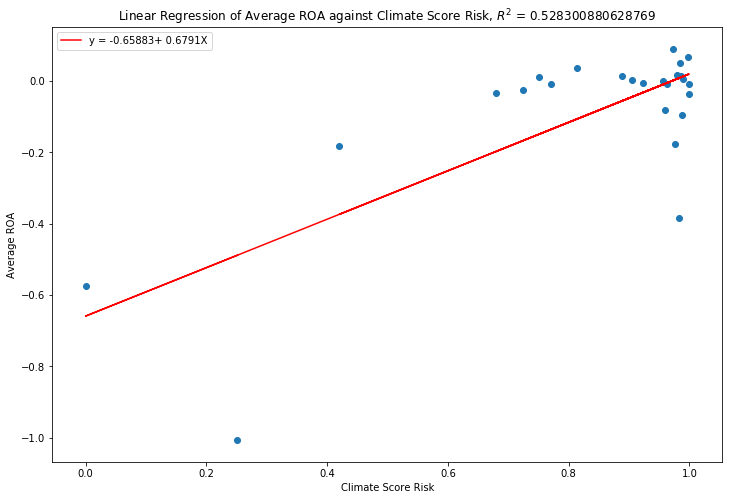

In [9]:
display_results(fin_data=data, climate_data=STORMS, method='Average', start_year='1996', end_year='2019', sector_name='Agriculture', sector_naics='11')

In [10]:
def climate_loss(climate_data, state, start_year, end_year):
    df = climate_data.loc[(climate_data.index>=start_year) & (climate_data.index<=end_year) & (climate_data.STATE==state)]
    
    return df[['TOTAL_DAMAGES', 'DEATHS_DIRECT']].resample('Q').sum()

In [11]:
def climate_loss2(climate_data, start_year, end_year):
    df = climate_data.loc[(climate_data.index>=start_year) & (climate_data.index<=end_year)]
    return df[['TOTAL_DAMAGES', 'DEATHS_DIRECT']].resample('Q').sum()

In [12]:
climate_loss2(climate_data=STORMS, start_year='1996-01-01', end_year='2019-12-31')

,TOTAL_DAMAGES,DEATHS_DIRECT
1996-03-31,7.625830e+07,8
1996-06-30,5.352800e+08,3
1996-09-30,1.574707e+09,17
1996-12-31,2.272141e+08,7
1997-03-31,1.830180e+08,5
...,...,...
2018-12-31,2.751022e+10,113
2019-03-31,1.075273e+09,20
2019-06-30,2.831022e+09,37
2019-09-30,1.457152e+09,20


In [13]:
def choose_sector(fin_data, sector):
    df = fin_data.loc[(fin_data.naics.astype('str').str.startswith(sector))]
    return df

In [14]:
agr_data = choose_sector(fin_data=data, sector='11')

In [15]:
States = agr_data.State.unique()
reg_results = []
for state in States:
    ROAs=[]
    c_loss = climate_loss(climate_data=STORMS, state=state, start_year='1996-01-01', end_year='2019-12-31')
    for i in range(len(c_loss)):
        date = str(c_loss.index[i])[0:10]
        df = agr_data.loc[(agr_data.State==state) & (agr_data.index==date)]
        ROA = df.ROA.mean()
        ROAs.extend((date, ROA))
    ROAs = np.array(ROAs).reshape((int(len(ROAs)/2),2))
    ROAs = pd.DataFrame(ROAs, columns=['Date', 'ROA'])
    ROAs['ROA'] = ROAs['ROA'].astype('float')
    ROAs.index = pd.to_datetime(ROAs.Date)
    ROAs.drop(columns=['Date'], inplace=True)
    ROAs.dropna(inplace=True)
    c_loss.index.rename("Date", inplace=True)
    df_=c_loss.merge(ROAs, on='Date', how='left')
    df_.dropna(inplace=True)
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LassoCV
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()


    df_['TOTAL DAMAGES t-1'] = df_.TOTAL_DAMAGES.shift()
    df_['DEATHS t-1'] = df_.DEATHS_DIRECT.shift()
    df_['Delta ROA'] = df_['ROA'].pct_change()
    df_['Delta ROA t-1'] = df_['Delta ROA'].shift()
    df_.dropna(inplace=True)
    if len(df_) > 5:
        Y = df_['Delta ROA'].values.reshape(-1,1)
        #X = df_[['TOTAL_DAMAGES', 'DEATHS_DIRECT', 'TOTAL DAMAGES t-1', 'DEATHS t-1']].values
        X = df_[['TOTAL DAMAGES t-1']]
        X = scaler.fit_transform(X)
        model = LinearRegression().fit(X,Y)
        #reg = LassoCV(max_iter=100000).fit(X, Y.ravel())
        Y_pred = model.predict(X)
        R_squared = model.score(X,Y)
        #R_squared = reg.score(X,Y)
        n_obs = len(Y)
        reg_results.extend((state, R_squared, n_obs))
        
    else:
        pass
reg_results = np.array(reg_results).reshape((int(len(reg_results)/3), 3))
reg_results = pd.DataFrame(reg_results, columns=['State', 'R-squared', 'Nb obs'])
reg_results['R-squared'] = reg_results['R-squared'].astype("float")
reg_results.set_index("State", inplace=True)

In [16]:
print(reg_results.to_latex())

\begin{tabular}{lrl}
\toprule
{} &  R-squared & Nb obs \\
State          &            &        \\
\midrule
FLORIDA        &   0.000688 &     47 \\
MASSACHUSETTS  &   0.006478 &     31 \\
ILLINOIS       &   0.007914 &      8 \\
MISSISSIPPI    &   0.695927 &     17 \\
CALIFORNIA     &   0.000262 &     94 \\
NEW YORK       &   0.000853 &     42 \\
ARIZONA        &   0.004550 &     16 \\
OREGON         &   0.012407 &     34 \\
NEW JERSEY     &   0.033713 &     13 \\
TENNESSEE      &   0.096079 &     17 \\
NORTH CAROLINA &   0.000505 &     72 \\
PUERTO RICO    &   0.004105 &     28 \\
HAWAII         &   0.000470 &     87 \\
WASHINGTON     &   0.002446 &     91 \\
TEXAS          &   0.008620 &     18 \\
NORTH DAKOTA   &   0.002507 &     29 \\
PENNSYLVANIA   &   0.007889 &     30 \\
MISSOURI       &   0.043987 &     23 \\
\bottomrule
\end{tabular}



Sector: Construction

Ranking

                Average ROA  Climate Score Risk
State                                          
NEW YORK          -0.263003            0.959156
CALIFORNIA        -0.159487            0.444787
COLORADO          -0.126855            0.945901
TEXAS             -0.067741            0.000000
ARIZONA           -0.056220            0.963602
NEW JERSEY        -0.050335            0.429925
FLORIDA           -0.048009            0.263245
UTAH              -0.035984            0.989974
IDAHO             -0.024306            0.981902
NEBRASKA          -0.024053            0.921007
CONNECTICUT       -0.019734            0.997129
MINNESOTA         -0.016587            0.973323
LOUISIANA         -0.013920            0.728622
PENNSYLVANIA      -0.008697            0.984103
WEST VIRGINIA     -0.008309            0.991043
HAWAII            -0.005925            0.998861
OKLAHOMA          -0.005198            0.899970
WASHINGTON        -0.003356            0.968440
MARYLAND 

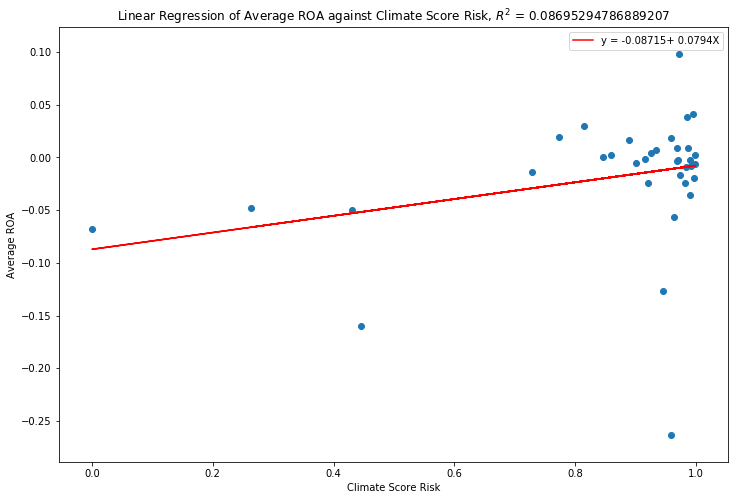

In [21]:
display_results(fin_data=data, climate_data=STORMS, method='Average', start_year='1996', end_year='2019', sector_name='Construction', sector_naics='23')

Sector: All

Ranking

                Average ROA  Climate Score Risk
State                                          
UTAH              -0.339374            0.993306
FLORIDA           -0.249109            0.531136
WASHINGTON        -0.147215            0.980037
NEW YORK          -0.124469            0.967552
CONNECTICUT       -0.102561            0.998164
TEXAS             -0.079655            0.000000
COLORADO          -0.054442            0.965703
OREGON            -0.052633            0.991594
ARIZONA           -0.047000            0.976396
NEW JERSEY        -0.037300            0.640683
HAWAII            -0.029649            0.999088
OKLAHOMA          -0.026131            0.932202
VIRGINIA          -0.025690            0.978472
LOUISIANA         -0.023504            0.802346
MINNESOTA         -0.023327            0.980962
CALIFORNIA        -0.021713            0.635424
MASSACHUSETTS     -0.015218            0.991080
MARYLAND          -0.013252            0.993457
ILLINOIS          

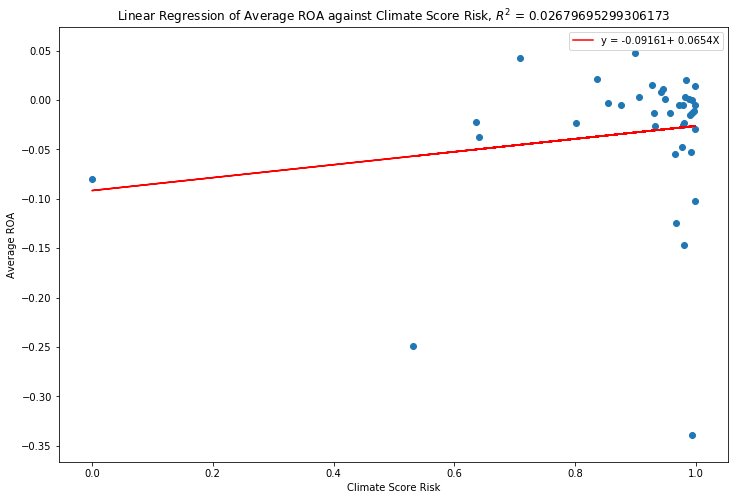

In [22]:
display_results(fin_data=data, climate_data=STORMS, method='Average', start_year='1996', end_year='2019', sector_name='All', sector_naics='72')

In [52]:
ranking_=ranking(fin_data=data, climate_data=STORMS, method='Average', start_year='1996', end_year='2019', sector_name='Agriculture', sector_naics='11')

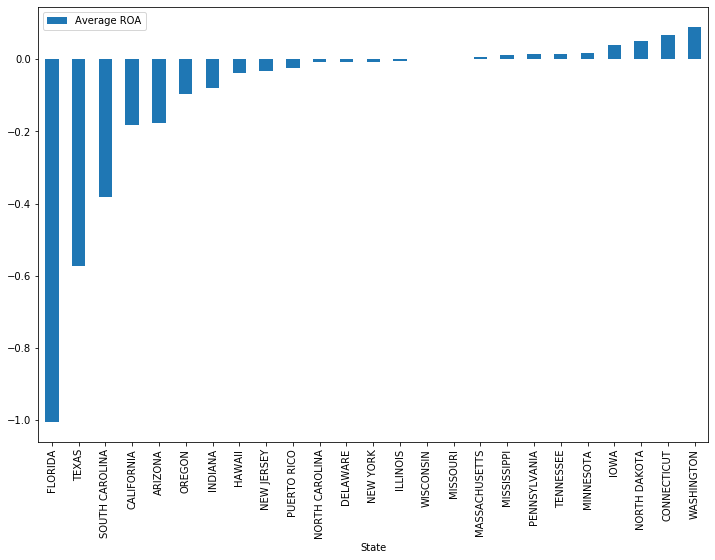

In [56]:
import matplotlib.pyplot as plt
x = ranking_['Average ROA'].values
condition = ranking_['Climate Score Risk'].median()
mask1 = 

# Markets Efficiency

In [23]:
STORMS

,Date,STATE,DAMAGE_PROPERTY,DAMAGE_CROPS,TOTAL_DAMAGES,DEATHS_DIRECT,DEATHS_INDIRECT,EVENT_TYPE,EVENT_ID,EPISODE_ID,Vulnerability Energy,Vulnerability Agriculture,Vulnerability Construction
1972-06-18,1972-06-18,FLORIDA,190000.0,5000.0,195000.0,0,0,Tornado,990000001,990000001.0,High,Medium,High
1972-06-18,1972-06-18,FLORIDA,10000.0,5000.0,15000.0,1,0,Tornado,990000002,990000001.0,High,Medium,High
1996-01-01,1996-01-01,MISSOURI,10000.0,0.0,10000.0,0,0,Winter Storm,5546429,2031319.0,High,Medium,High
1996-01-02,1996-01-02,KANSAS,8000.0,0.0,8000.0,1,0,Winter Storm,5536209,2404253.0,High,Medium,High
1996-01-02,1996-01-02,FLORIDA,1500.0,0.0,1500.0,0,0,Thunderstorm Wind,5538451,2404206.0,High,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,2019-12-30,WISCONSIN,384000.0,0.0,384000.0,0,0,Flood,863582,143837.0,High,High,High
2019-12-30,2019-12-30,OHIO,25000.0,0.0,25000.0,0,0,High Wind,870106,144846.0,High,Medium,High
2019-12-30,2019-12-30,NEW YORK,50000.0,0.0,50000.0,0,0,Strong Wind,865535,144202.0,Medium,High,High
2019-12-30,2019-12-30,OHIO,100000.0,0.0,100000.0,0,0,High Wind,870093,144846.0,High,Medium,High


In [24]:
df = STORMS.loc[STORMS.STATE=='TEXAS']
df

,Date,STATE,DAMAGE_PROPERTY,DAMAGE_CROPS,TOTAL_DAMAGES,DEATHS_DIRECT,DEATHS_INDIRECT,EVENT_TYPE,EVENT_ID,EPISODE_ID,Vulnerability Energy,Vulnerability Agriculture,Vulnerability Construction
1996-02-01,1996-02-01,TEXAS,1500000.0,50000.0,1550000.0,0,0,Winter Storm,5542458,2029296.0,High,Medium,High
1996-02-04,1996-02-04,TEXAS,20000.0,0.0,20000.0,1,0,Ice Storm,5541924,2403276.0,High,Medium,High
1996-02-04,1996-02-04,TEXAS,10000.0,0.0,10000.0,0,0,Ice Storm,5541923,2403275.0,High,Medium,High
1996-03-05,1996-03-05,TEXAS,20000.0,0.0,20000.0,0,0,Lightning,5539346,2029428.0,High,Medium,High
1996-03-05,1996-03-05,TEXAS,5000.0,0.0,5000.0,0,0,Thunderstorm Wind,5539340,1001611.0,High,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-29,2019-10-29,TEXAS,3000000.0,0.0,3000000.0,0,0,Thunderstorm Wind,862080,143663.0,High,Medium,High
2019-10-29,2019-10-29,TEXAS,50000.0,0.0,50000.0,0,0,Thunderstorm Wind,862081,143663.0,High,Medium,High
2019-11-11,2019-11-11,TEXAS,400.0,0.0,400.0,0,0,Strong Wind,865013,144112.0,Medium,High,High
2019-11-20,2019-11-20,TEXAS,1000.0,0.0,1000.0,0,0,Strong Wind,866688,144372.0,Medium,High,High


In [44]:
def trend_ranking(data, type_damage, type_disaster, min_date, max_date, frequency, method):
    import pymannkendall as mk
    import pandas as pd
    import numpy as np
    import scipy
    States = list(data.STATE.unique())
    data_ = data.loc[(data.index>=min_date) & (data.index<=max_date)]
    
    if type_disaster == 'All':
        data_ =  data_
    else:
        data_ = data_.loc[data_.EVENT_TYPE==type_disaster]
    
    ranking = []
    
    for state in States:
        df = data_.loc[data_.STATE==state]
        df = df.resample(frequency, on='Date').sum()
        if len(df) < 2:
            pass
        else:
            df = df[type_damage]
            if method == 'Original':
                trend,h,p,z,Tau,s,var_s,slope,intercept = mk.original_test(df)
            elif method == 'Seasonal':
                trend,h,p,z,Tau,s,var_s,slope,intercept = mk.seasonal_test(df)
            else:
                print('This method is not available.')    
            sen_slope = scipy.stats.mstats.theilslopes(df)[0]
            ranking.extend((state, trend, sen_slope, Tau, p))
    n = int(len(ranking)/5)
    ranking = np.array(ranking).reshape((n, 5))
    ranking = pd.DataFrame(data=ranking, columns=['State', 'Trend', 'Sen Slope', 'Kendall Tau', 'P-value'])
    for columns in ['Sen Slope', 'Kendall Tau', 'P-value']:
        ranking[columns] = ranking[columns].astype('float')
    ranking.sort_values(by='Sen Slope', inplace=True, ascending=False)
    ranking.reset_index(inplace=True)
    ranking.drop(columns=['index'], inplace=True)
    
    return ranking

def TotalLoss_ranking(data, type_damage, type_disaster, min_date, max_date):
    import pandas as pd
    import numpy as np
    
    States = list(data.STATE.unique())
    data_ = data.loc[(data.index>=min_date) & (data.index<=max_date)]
    
    if type_disaster == 'All':
        data_ =  data_
    else:
        data_ = data_.loc[data_.EVENT_TYPE==type_disaster]
        
    ranking = []
    
    for state in States:
        df = data_.loc[data_.STATE==state][type_damage]
        #if len(df) < 2:
         #   pass
        #else:
        loss = df.sum()
        ranking.extend((state, loss))
            
    n = int(len(ranking)/2)
    ranking = np.array(ranking).reshape((n, 2))
    ranking = pd.DataFrame(data=ranking, columns=['State', 'Total Loss'])
    ranking['Total Loss'] = ranking['Total Loss'].astype('float')
    ranking.sort_values(by='Total Loss', inplace=True, ascending=False)
    ranking.reset_index(inplace=True)
    ranking.drop(columns=['index'], inplace=True)
    
    return ranking
            
        

In [60]:
trends = trend_ranking(STORMS, 'TOTAL_DAMAGES', 'All', '1996-01-01', '2014-01-01', 'M', 'Seasonal')
trends

,State,Trend,Sen Slope,Kendall Tau,P-value
0,TEXAS,increasing,63330.918306,0.338780,5.778711e-12
1,MISSISSIPPI,increasing,3696.537291,0.435520,0.000000e+00
2,IOWA,increasing,3222.891566,0.335237,2.724709e-12
3,ARKANSAS,increasing,2894.427245,0.471133,0.000000e+00
4,OKLAHOMA,increasing,2727.272727,0.488575,0.000000e+00
5,NEW YORK,increasing,2457.609806,0.421791,0.000000e+00
6,OHIO,increasing,2035.300207,0.393838,0.000000e+00
7,GEORGIA,increasing,1932.773109,0.366260,1.909584e-14
8,PENNSYLVANIA,increasing,1851.851852,0.452661,0.000000e+00
9,CALIFORNIA,increasing,1274.617539,0.313725,4.078271e-11


In [46]:
r = TotalLoss_ranking(STORMS, 'TOTAL_DAMAGES', 'All', '2016-01-01', '2017-01-01')
r.loc[r.State=='TEXAS']

,State,Total Loss
1,TEXAS,3.603657e+09


In [49]:
agr_data.gvkey.unique()

array([  1266,   1702,   1717,   2152,   2249,   2275,   2608,   2618,
         2812,   2957,   2995,   3702,   3884,   4576,   4735,   5416,
         5627,   6275,   6395,   7239,   7675,   8596,   9054,   9062,
         9821,   9945,   9986,  10390,  10884,  10971,  10982,  11033,
        11791,  11924,  12349,  12386,  12466,  12750,  13097,  13155,
        13156,  13462,  13468,  13550,  13743,  14002,  14400,  14881,
        15709,  16566,  19965,  20155,  20327,  20658,  22578,  23080,
        23082,  24448,  24900,  28524,  29962,  35168,  64275,  65158,
        65186,  65979,  66101,  66482, 111868, 121722, 140760, 147855,
       148352, 160635, 165832, 170598, 184259, 186608, 187285, 187769])

In [50]:
data_stocks = pd.read_csv('/Users/allanbellahsene/Desktop/THESIS/DATA/WHARTON_DATABASE/Monthly_stocks.csv')
stocks = data_stocks.loc[data_stocks['loc'] == 'USA']
stocks['Date'] = stocks[['datadate']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
stocks.index = pd.to_datetime(stocks.Date, format="%m/%d/%Y")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))
stocks_data = stocks
stocks_data['State'] = stocks_data['state'].map(abbrev_us_state)
stocks_data.State = stocks_data.State.str.upper()
stocks_data = stocks_data[['conm', 'gvkey', 'naics', 'prccm','trt1m', 'State']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
gvkeys = list(agr_data.gvkey.unique())
stocks_data = stocks_data.loc[stocks_data.gvkey.isin(gvkeys)]

In [53]:
stocks = []
for comp in list(stocks_data.conm.unique()):
    subdf = stocks_data.loc[stocks_data.conm==comp]
    subdf['Monthly Return'] = subdf.prccm.pct_change()
    subdf = subdf.loc[abs(subdf['Monthly Return']) < 10]
    stocks.append(subdf)
df = pd.concat([stocks[0], stocks[1]], axis=0)
for i in range(2, len(stocks)):
    df = pd.concat([df, stocks[i]], axis=0)
df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,conm,gvkey,naics,prccm,trt1m,State,Monthly Return
Date,,,,,,,
1962-04-30,ALICO INC,1266,111310.0,7.8750,-12.5000,FLORIDA,-0.125000
1962-05-31,ALICO INC,1266,111310.0,6.5000,-17.4603,FLORIDA,-0.174603
1962-06-30,ALICO INC,1266,111310.0,5.6250,-13.4615,FLORIDA,-0.134615
1962-07-31,ALICO INC,1266,111310.0,5.8750,4.4444,FLORIDA,0.044444
1962-08-31,ALICO INC,1266,111310.0,6.8750,17.0213,FLORIDA,0.170213
...,...,...,...,...,...,...,...
2019-09-30,BIOPOWER OPERATIONS CORP,187769,111998.0,0.0450,-42.3077,FLORIDA,-0.423077
2019-10-31,BIOPOWER OPERATIONS CORP,187769,111998.0,0.0250,-44.4444,FLORIDA,-0.444444
2019-11-30,BIOPOWER OPERATIONS CORP,187769,111998.0,0.0447,78.8000,FLORIDA,0.788000


In [167]:
start_year = '1996-01-01'
returns = []
for years in list(np.arange(2014, 2019)):
    end_year = str(years)+'-01-01'
    trends = trend_ranking(STORMS, 'TOTAL_DAMAGES', 'All', start_year, end_year, 'M', 'Seasonal')
    year_ = str(years+1)+'-01-01'
    States = df['State'].loc[(df.index>=end_year) & (df.index<=year_)].unique()
    trends = trends.loc[trends.State.isin(States)]
    best_state = trends.State.iloc[-1]
    worst_state = trends.State.iloc[0]
    subdf = df.loc[(df.index>=end_year) & (df.index<=year_)& (df.State==worst_state)]
    companies = subdf.conm.unique()
    annual_returns = []
    for comp in companies:
        sdf_ = subdf.loc[subdf.conm==comp]
        ret = (sdf_.prccm.iloc[-1] - sdf_.prccm.iloc[0])/sdf_.prccm.iloc[0]
        annual_returns.extend((comp, ret))
    annual_returns = np.array(annual_returns).reshape((int(len(annual_returns)/2), 2))
    short_ret = []
    for i in range(len(annual_returns)):
        short_ret.append(1+float(annual_returns[i,1]))
    short_ret = np.prod(short_ret)-1
    
    subdf = df.loc[(df.index>=end_year) & (df.index<=year_)& (df.State==best_state)]
    companies = subdf.conm.unique()
    annual_returns = []
    for comp in companies:
        sdf_ = subdf.loc[subdf.conm==comp]
        ret = (sdf_.prccm.iloc[-1] - sdf_.prccm.iloc[0])/sdf_.prccm.iloc[0]
        annual_returns.extend((comp, ret))
    annual_returns = np.array(annual_returns).reshape((int(len(annual_returns)/2), 2))
    long_ret = []
    for i in range(len(annual_returns)):
        long_ret.append(1+float(annual_returns[i,1]))
    long_ret = np.prod(long_ret)-1
    
    strategy_ret = long_ret - short_ret
    
    
    returns.extend((str(years), strategy_ret))
        
    

In [168]:
returns

['2014',
 0.4356052729415174,
 '2015',
 0.020714285714285685,
 '2016',
 0.5910972017673048,
 '2017',
 0.5368581340233332,
 '2018',
 0.5809278350515464]

In [154]:
np.prod([1, 2, 10])

20

In [160]:
States = df.State.unique()
trends = trend_ranking(STORMS, 'TOTAL_DAMAGES', 'All', '1996-01-01', '2014-01-01', 'M', 'Seasonal')
trends.loc[trends.State.isin(States)]

,State,Trend,Sen Slope,Kendall Tau,P-value
0,TEXAS,increasing,63330.918306,0.338780,5.778711e-12
1,MISSISSIPPI,increasing,3696.537291,0.435520,0.000000e+00
2,IOWA,increasing,3222.891566,0.335237,2.724709e-12
4,OKLAHOMA,increasing,2727.272727,0.488575,0.000000e+00
5,NEW YORK,increasing,2457.609806,0.421791,0.000000e+00
6,OHIO,increasing,2035.300207,0.393838,0.000000e+00
8,PENNSYLVANIA,increasing,1851.851852,0.452661,0.000000e+00
9,CALIFORNIA,increasing,1274.617539,0.313725,4.078271e-11
11,KENTUCKY,increasing,1000.000000,0.340056,7.218670e-12
13,ILLINOIS,increasing,825.834176,0.430252,0.000000e+00


In [161]:
df['State'].loc[(df.index>='2014-01-01') & (df.index<='2015-01-01')].unique()

array(['FLORIDA', 'CALIFORNIA', 'NEW YORK', 'NORTH CAROLINA',
       'PUERTO RICO', 'HAWAII', 'WASHINGTON', 'NORTH DAKOTA', 'INDIANA',
       'MISSISSIPPI', 'MISSOURI', 'TENNESSEE'], dtype=object)

In [144]:
subdf = df.loc[(df.index>='2019-01-01') & (df.index<='2020-01-01')& (df.State=='TEXAS')]
companies = subdf.conm.unique()
annual_returns = []
for comp in companies:
    sdf_ = subdf.loc[subdf.conm==comp]
    ret = (sdf_.prccm.iloc[-1] - sdf_.prccm.iloc[0])/sdf_.prccm.iloc[0]
    annual_returns.extend((comp, ret))

In [145]:
annual_returns

['NATURALSHRIMP INC', 0.4322916666666668]

In [104]:
-((1+0.02)*(1-0.675)*(1-0.82) - 1)

0.94033

In [146]:
subdf = df.loc[(df.index>='2019-01-01') & (df.index<='2020-01-01')& (df.State=='DELAWARE')]
companies = subdf.conm.unique()
annual_returns = []
for comp in companies:
    sdf_ = subdf.loc[subdf.conm==comp]
    ret = (sdf_.prccm.iloc[-1] - sdf_.prccm.iloc[0])/sdf_.prccm.iloc[0]
    annual_returns.extend((comp, ret))

In [147]:
annual_returns

['CORTEVA INC', -0.0003381805884342767]

In [107]:
0.21+0.94

1.15

In [64]:
df.loc[(df.State=='TEXAS') & (df.index>='2014-01-01')]

,conm,gvkey,naics,prccm,trt1m,State,Monthly Return
Date,,,,,,,
2015-02-28,NATURALSHRIMP INC,23082,112512.0,1.0000,0.0000,TEXAS,0.000000
2015-03-31,NATURALSHRIMP INC,23082,112512.0,2.4000,140.0000,TEXAS,1.400000
2015-04-30,NATURALSHRIMP INC,23082,112512.0,1.5000,-37.5000,TEXAS,-0.375000
2015-05-31,NATURALSHRIMP INC,23082,112512.0,1.9000,26.6667,TEXAS,0.266667
2015-06-30,NATURALSHRIMP INC,23082,112512.0,1.8000,-5.2632,TEXAS,-0.052632
2015-07-31,NATURALSHRIMP INC,23082,112512.0,1.7500,-2.7778,TEXAS,-0.027778
2015-08-31,NATURALSHRIMP INC,23082,112512.0,1.7500,0.0000,TEXAS,0.000000
2015-09-30,NATURALSHRIMP INC,23082,112512.0,1.9500,11.4286,TEXAS,0.114286
2015-10-31,NATURALSHRIMP INC,23082,112512.0,1.9500,0.0000,TEXAS,0.000000


In [61]:
trends = trend_ranking(STORMS, 'TOTAL_DAMAGES', 'All', '1996-01-01', '2014-01-01', 'M', 'Seasonal')
trends

,State,Trend,Sen Slope,Kendall Tau,P-value
0,TEXAS,increasing,63330.918306,0.338780,5.778711e-12
1,MISSISSIPPI,increasing,3696.537291,0.435520,0.000000e+00
2,IOWA,increasing,3222.891566,0.335237,2.724709e-12
3,ARKANSAS,increasing,2894.427245,0.471133,0.000000e+00
4,OKLAHOMA,increasing,2727.272727,0.488575,0.000000e+00
5,NEW YORK,increasing,2457.609806,0.421791,0.000000e+00
6,OHIO,increasing,2035.300207,0.393838,0.000000e+00
7,GEORGIA,increasing,1932.773109,0.366260,1.909584e-14
8,PENNSYLVANIA,increasing,1851.851852,0.452661,0.000000e+00
9,CALIFORNIA,increasing,1274.617539,0.313725,4.078271e-11
